# Data Sampling and Formatting

In this notebook, I load and clean the Vehicle Complaints dataset from the U.S National Highway Traffic Safety Administration (NHTSA). This dataset contains more than 200,000 customer-submitted complaints about vehicle issues. Most importantly, the dataset includes a short summary of the problem and one or more vehicle components affected (e.g., "SERVICE BRAKES", "AIR BAGS", "SUSPENSION").

The goal of this project is to build and compare various machine learning models that can predict the vehicle component involved based on the written complaint.

## Setup and Preview of Data

Below, I download the dataset from Kaggle. This specific dataset can be found here: [NHTSA Customer Complaints Dataset (2019-Present)](https://www.kaggle.com/datasets/alshival/nhtsa-complaints/data)

I also view the dataset to get an idea of its structure.

In [23]:
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# Upload kaggle.json
from google.colab import files
print("Upload your kaggle.json file...")
files.upload()

# Move kaggle.json to correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle CLI
!pip install -q kaggle

# Download the dataset from Kaggle and unzip it
!kaggle datasets download -d alshival/nhtsa-complaints
!unzip -o nhtsa-complaints.zip

# Create project folder in Drive
import os
project_path = '/content/drive/MyDrive/vehicle-complaints-project'
os.makedirs(project_path, exist_ok=True)
!mv complaints.csv "$project_path"

print(f"Dataset is now available at: {project_path}/complaints.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Upload your kaggle.json file...


Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/alshival/nhtsa-complaints
License(s): CC0-1.0
nhtsa-complaints.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  nhtsa-complaints.zip
  inflating: car_models.csv          
  inflating: complaints.csv          
  inflating: investigations.csv      
  inflating: ratings.csv             
  inflating: recalls.csv             
Dataset is now available at: /content/drive/MyDrive/vehicle-complaints-project/complaints.csv


In [24]:
# Import the dataset into pandas and turn it into a dataframe
import pandas as pd

DATA_PATH = '/content/drive/MyDrive/vehicle-complaints-project/complaints.csv'
df = pd.read_csv(DATA_PATH)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Previewing the data
print("First rows of the unedited dataset including all columns: \n")
df.head()

First rows of the unedited dataset including all columns: 



,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,summary,products,make,model,modelYear
0,10702705,"Kia America, Inc.",True,False,0,0,03/24/2015,03/30/2015,5XYPG4A36GG,"SEAT BELTS,SEATS",SEAT BELT DID NOT UNLATCH AFTER CRASH. *TR,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016
1,10713088,"Kia America, Inc.",False,False,0,0,04/24/2015,04/27/2015,5XYPH4A15GG,STRUCTURE,"TRAVELING AT HIGHWAY SPEED, THE WINDSHIELD SEE...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016
2,10713503,"ALUMA TOWER COMPANY, INC",False,True,0,0,04/28/2015,04/29/2015,1YGAE1629GB,ELECTRICAL SYSTEM,TL* THE CONTACT OWNS A 2016 ALUMA AE716TA TRAI...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",ALUMA,AE716TA,2016
3,10715078,"Kia America, Inc.",False,False,0,0,04/30/2015,05/07/2015,NaN,STEERING,"WHILE TRAVELING AT HIGHWAY SPEEDS, THE SORENTO...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016
4,10715844,Volvo Trucks North America,False,False,0,0,03/06/2015,05/12/2015,4V4NC9EH7GN,SUSPENSION,SINCE THE PURCHASE OF THIS VEHICLE IT HAS AN U...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",VOLVO,780,2016


In [26]:
print("Unedited dataset information:")
df.info()

# Below are the two columns to be used in this project
# Summary column details the vehicle owner's complaints about what went wrong
# with their vehicle and the Components column details the exact part of the
# vehcle that's caused the complaint in the first place
print("Unedited dataset information:")
df[["summary", "components"]]


Unedited dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205719 entries, 0 to 205718
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   odiNumber           205719 non-null  int64 
 1   manufacturer        205719 non-null  object
 2   crash               205719 non-null  bool  
 3   fire                205719 non-null  bool  
 4   numberOfInjuries    205719 non-null  int64 
 5   numberOfDeaths      205719 non-null  int64 
 6   dateOfIncident      205719 non-null  object
 7   dateComplaintFiled  205719 non-null  object
 8   vin                 201434 non-null  object
 9   components          205719 non-null  object
 10  summary             205708 non-null  object
 11  products            205719 non-null  object
 12  make                205719 non-null  object
 13  model               205719 non-null  object
 14  modelYear           205719 non-null  int64 
dtypes: bool(2), int64(4),

,summary,components
0,SEAT BELT DID NOT UNLATCH AFTER CRASH. *TR,"SEAT BELTS,SEATS"
1,"TRAVELING AT HIGHWAY SPEED, THE WINDSHIELD SEE...",STRUCTURE
2,TL* THE CONTACT OWNS A 2016 ALUMA AE716TA TRAI...,ELECTRICAL SYSTEM
3,"WHILE TRAVELING AT HIGHWAY SPEEDS, THE SORENTO...",STEERING
4,SINCE THE PURCHASE OF THIS VEHICLE IT HAS AN U...,SUSPENSION
...,...,...
205714,My accord has an EPS gearbox recall. Causing p...,STEERING
205715,I am filing a complaint regarding an unresolve...,FUEL/PROPULSION SYSTEM
205716,car will not accelerate after pressing gas ped...,VEHICLE SPEED CONTROL
205717,"Transmission is sluggish, seems to be slipping...",POWER TRAIN


## Basic Cleaning and Formatting

In the cell below, I


*   Remove rows with missing summaries or components
*   Normalize complaint text to lowercase
*   Simplify the label by selecting only the first listed component when multiple are mentioned
* Remove ambiguous entries with components like "unknown and other"
* Select the top 10 most frequent components out of 44 to ensure class balance and model learnability
* Save the cleaned dataset for future reasue



Number of distinct components: 43

Top 15 Components by Frequency:
components
electrical system              31911
power train                    29049
engine                         24842
steering                       16095
service brakes                 12907
structure                       8529
air bags                        7949
visibility/wiper                7011
fuel/propulsion system          5478
vehicle speed control           5436
exterior lighting               4511
forward collision avoidance     4407
engine and engine cooling       4404
suspension                      3737
fuel system                     3115
Name: count, dtype: int64

Sampled and Formatted Dataset Shape (top 10 valid classes) (149207, 15)


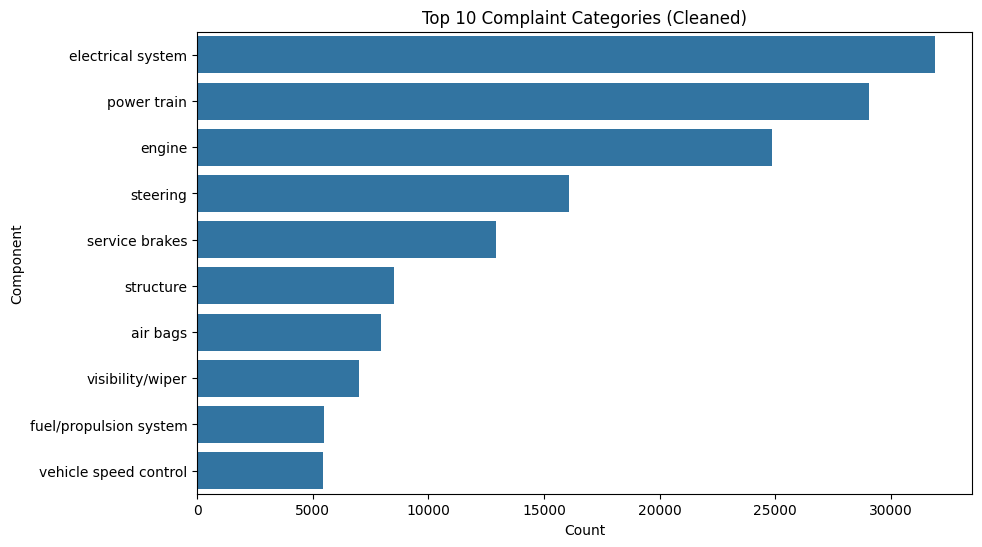

Cleaned dataset saved to: /content/drive/MyDrive/vehicle-complaints-project/complaints_cleaned_top10.csv


In [27]:
# Dropping rows with missing summaries or component fields
df.dropna(subset=["summary", "components"], inplace=True)

# Normalize all summaries and components to lowercase
df['summary'] = df['summary'].str.lower()
df['components'] = df['components'].str.lower()

# As seen in above, some fields have multiple components.
# I split the component field and keep only the first component
df['components'] = df['components'].str.split(',').str[0].str.strip()

# Remove all rows that contain the 'unknown or other' option as this is too
# vague to classify
df = df[df['components'].str.lower() != 'unknown or other']

# Checking number of distinct components available now
print(f"Number of distinct components: {df['components'].nunique()}")
print("\nTop 15 Components by Frequency:")
print(df['components'].value_counts().head(15))

# Calculating top N classes (not including 'unknown or other')
top_n = 10
top_components = df['components'].value_counts().nlargest(top_n).index
df_top = df[df['components'].isin(top_components)].copy()
print("\nSampled and Formatted Dataset Shape (top 10 valid classes)", df_top.shape)

# Generating a count plot
plt.figure(figsize=(10, 6))
sns.countplot(y='components', data=df_top, order=top_components)
plt.title("Top 10 Complaint Categories (Cleaned)")
plt.xlabel("Count")
plt.ylabel("Component")
plt.show()

# Saving cleaned dataset
cleaned_path = f'{project_path}/complaints_cleaned_top10.csv'
df_top.to_csv(cleaned_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_path}")